In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('SpotifyFeatures.csv', index_col='popularity')


In [ ]:
df.describe()

In [4]:
scaler = StandardScaler()

In [5]:
df[['danceability_T', 'energy_T', 'instrumentalness_T']] = scaler.fit_transform(df[['danceability', 'energy', 'instrumentalness']])

In [ ]:
df

In [6]:
def optimizeKMeans(data, maxK):
      means = []
      inertias = []

      for k in range(1, maxK):
            kmeans = KMeans (n_clusters=k)
            kmeans.fit(data)

            means.append(k)
            inertias.append(kmeans.inertia_)

      #Generate the elbow plot
      fig = plt.subplots(figsize=(20,10))
      plt.plot(means, inertias, 'o-')
      plt.xlabel('Number of Clusters')
      plt.ylabel('Inertia')
      plt.grid(True)
      plt.show()


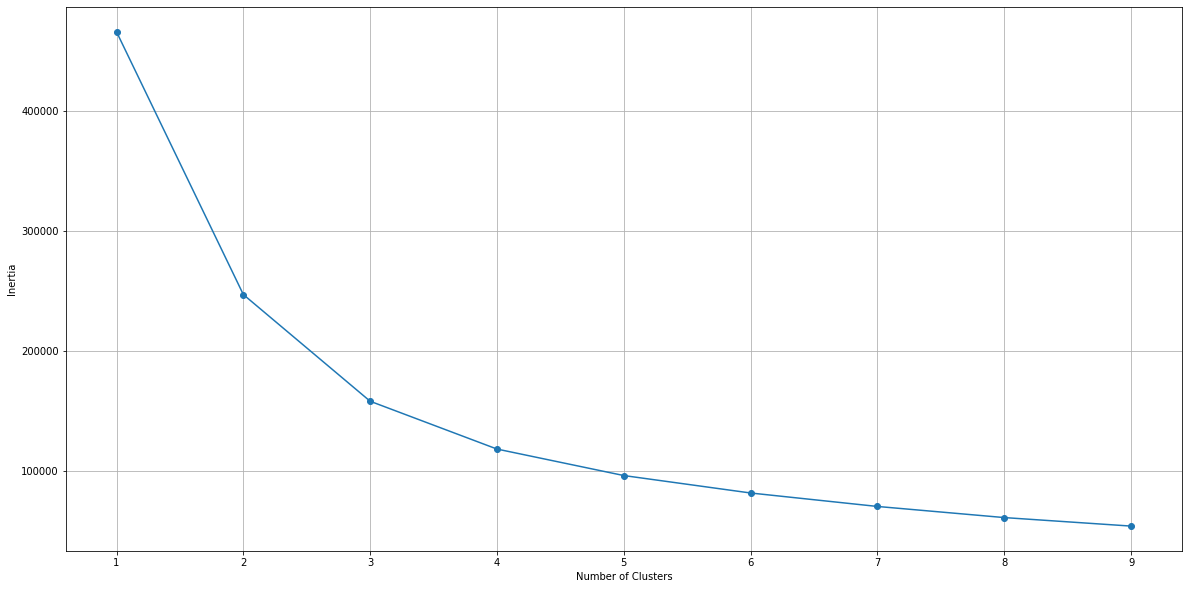

In [7]:
optimizeKMeans(df[['danceability_T', 'energy_T']], 10)

In [8]:
kmeans = KMeans(n_clusters=7)

In [9]:
kmeans.fit(df[['danceability_T', 'energy_T']])

KMeans(n_clusters=7)

In [10]:
df['kmeans_7'] = kmeans.labels_

In [ ]:
df

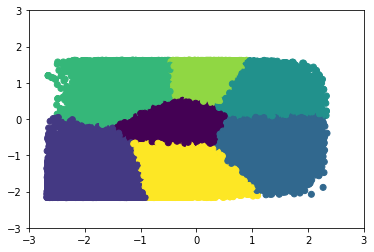

In [13]:
plt.scatter(x=df['danceability_T'], y=df['energy_T'], c=df['kmeans_7'])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()


In [11]:
for k in range (1, 8):
      kmeans = KMeans(n_clusters=k)
      kmeans.fit(df[['danceability_T', 'energy_T']])
      df[f'KMeans_{k}'] = kmeans.labels_


In [ ]:
df

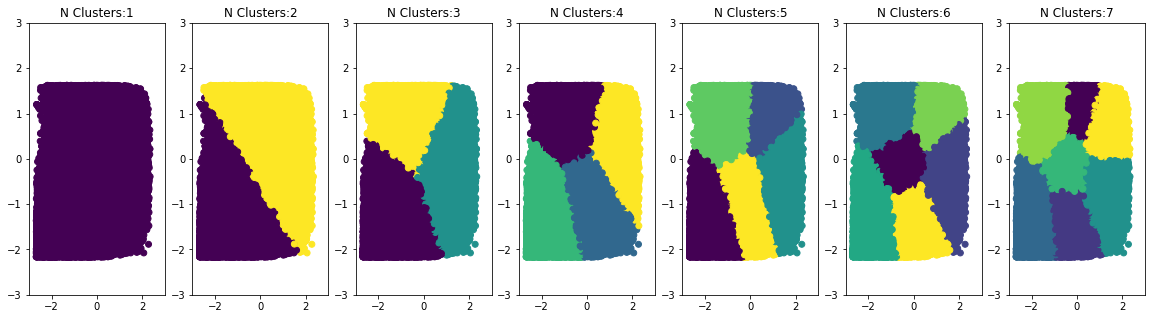

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=7, figsize=(20,5))

for i, ax in  enumerate(fig.axes, start=1):
      ax.scatter(x=df['danceability_T'],y=df['energy_T'], c=df[f'KMeans_{i}'])
      ax.set_ylim(-3, 3)
      ax.set_xlim(-3, 3)
      ax.set_title(f'N Clusters:{i}')
